In [1]:
import pandas as pd

# Read the CSV file
file_path = '../preped.csv'
df = pd.read_csv(file_path)

In [13]:
print(df.columns)

Index(['Title', 'Is Series', 'Hidden Gem Score', 'Runtime', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date', 'IMDb Votes',
       'Minimum Age', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

feature_columns = ['Is Series', 'Hidden Gem Score', 'Runtime', 'Minimum Age', 'Awards Received', 'Awards Nominated For', 'Boxoffice', 'Release Date', 'IMDb Votes', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']
target_column = 'IMDb Score'

# Separate the features and target variable
X = df[feature_columns]
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # Default to 5 neighbors
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

Mean Absolute Error: 0.503
Mean Squared Error: 0.466
R^2 Score: 0.460


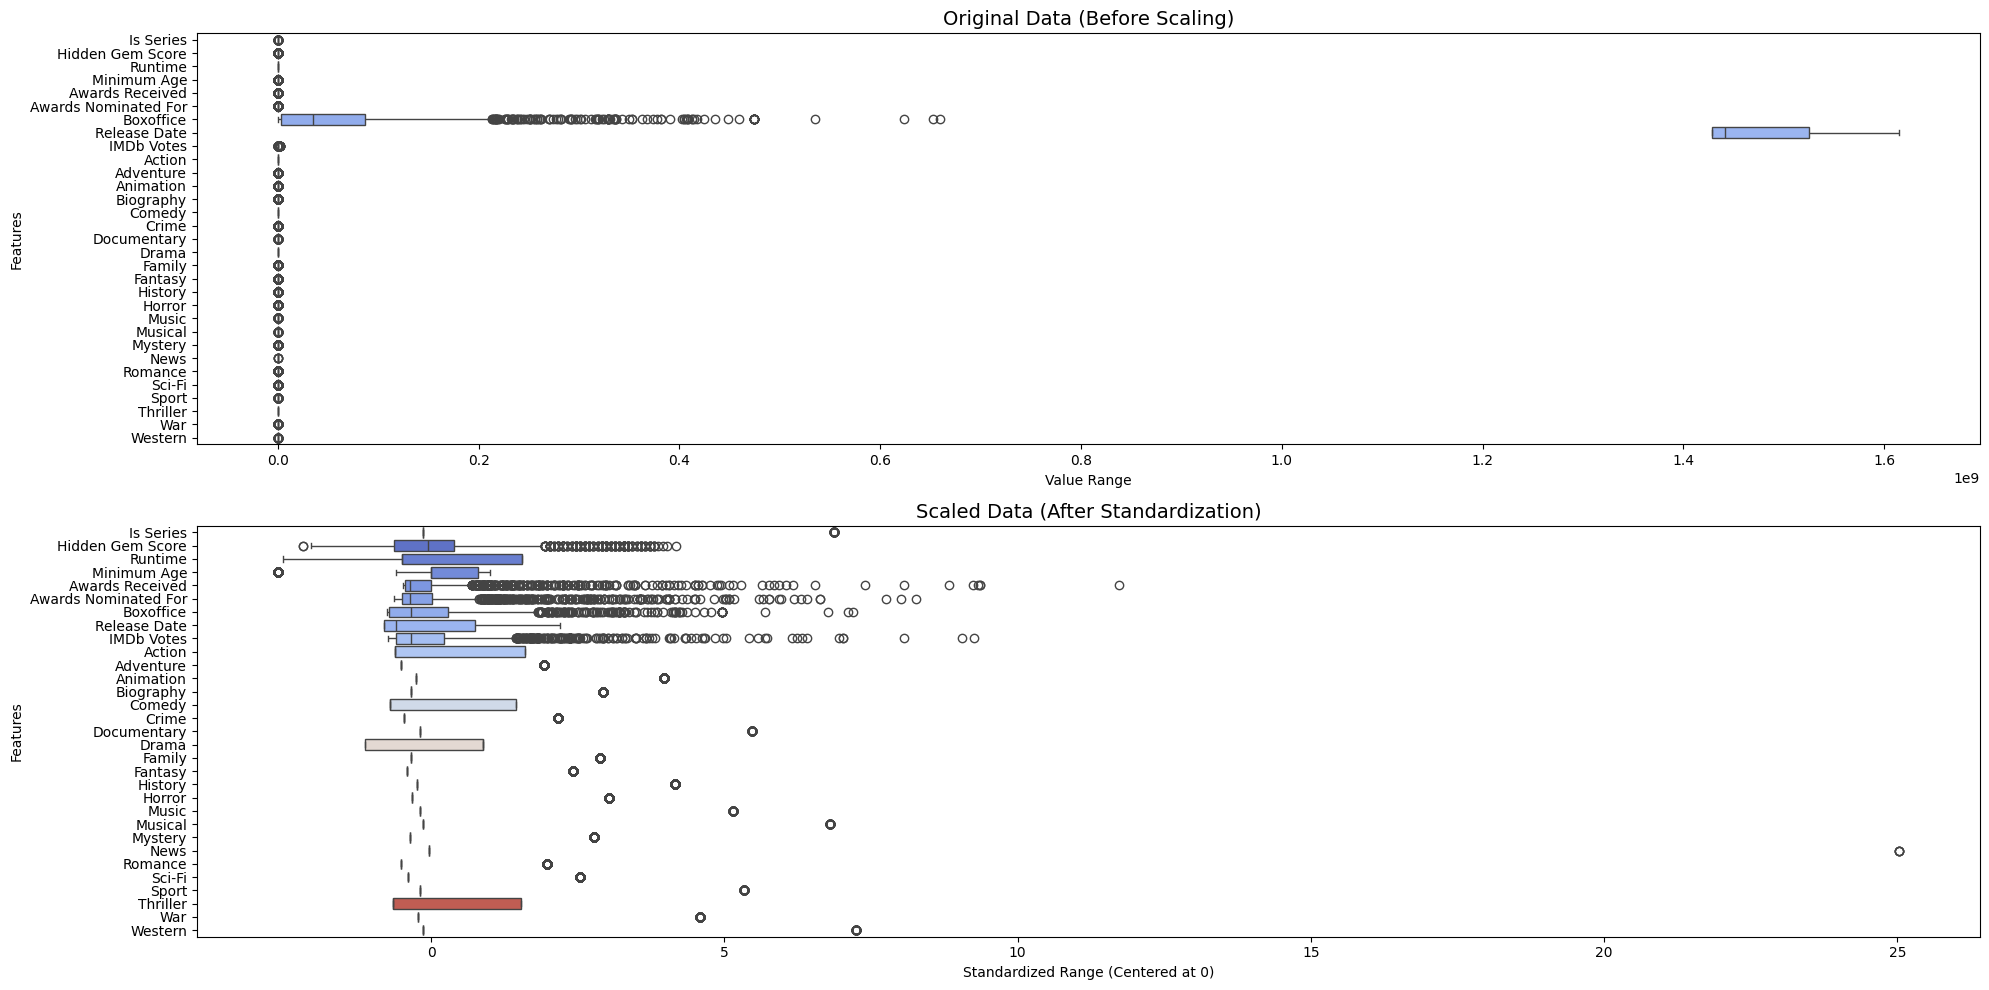

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Create a DataFrame for easier visualization
scaled_df = pd.DataFrame(scaled_features, columns=feature_columns)

# Visualize the distributions of original and scaled data
plt.figure(figsize=(20, 10))

# Plot original data
plt.subplot(2, 1, 1)
sns.boxplot(data=X, orient='h', palette='coolwarm')
plt.title('Original Data (Before Scaling)', fontsize=14)
plt.xlabel('Value Range')
plt.ylabel('Features')

# Plot scaled data
plt.subplot(2, 1, 2)
sns.boxplot(data=scaled_df, orient='h', palette='coolwarm')
plt.title('Scaled Data (After Standardization)', fontsize=14)
plt.xlabel('Standardized Range (Centered at 0)')
plt.ylabel('Features')

plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")


Best Parameters: {'n_neighbors': 9}


In [17]:
# Use the best model from GridSearchCV
best_knn_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred_tuned = best_knn_model.predict(X_test_scaled)

# Evaluate the tuned model
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

# Print the evaluation metrics
print("Evaluation Metrics for the Tuned KNN Model:")
print(f"Mean Absolute Error: {mae_tuned:.3f}")
print(f"Mean Squared Error: {mse_tuned:.3f}")
print(f"R^2 Score: {r2_tuned:.3f}")


Evaluation Metrics for the Tuned KNN Model:
Mean Absolute Error: 0.500
Mean Squared Error: 0.464
R^2 Score: 0.462


Before:\
Mean Absolute Error: 0.503\
Mean Squared Error: 0.466\
R^2 Score: 0.460

After:\
Mean Absolute Error: 0.500\
Mean Squared Error: 0.464\
R^2 Score: 0.462

# Train Rotten Tomatoes Score

In [18]:
# Define the target column for Rotten Tomatoes Score
target_column_rt = 'Rotten Tomatoes Score'

# Separate the features and target variable for Rotten Tomatoes Score
X_rt = df[feature_columns]
y_rt = df[target_column_rt]

# Split the data into training and testing sets
X_train_rt, X_test_rt, y_train_rt, y_test_rt = train_test_split(X_rt, y_rt, test_size=0.2, random_state=42)

# Standardize the feature data
scaler_rt = StandardScaler()
X_train_scaled_rt = scaler_rt.fit_transform(X_train_rt)
X_test_scaled_rt = scaler_rt.transform(X_test_rt)

# Create and train the KNN model for Rotten Tomatoes Score
knn_model_rt = KNeighborsRegressor(n_neighbors=5)  # Default to 5 neighbors
knn_model_rt.fit(X_train_scaled_rt, y_train_rt)

# Make predictions
y_pred_rt = knn_model_rt.predict(X_test_scaled_rt)

# Evaluate the model
mae_rt = mean_absolute_error(y_test_rt, y_pred_rt)
mse_rt = mean_squared_error(y_test_rt, y_pred_rt)
r2_rt = r2_score(y_test_rt, y_pred_rt)

# Print evaluation metrics
print(f"Mean Absolute Error (Rotten Tomatoes Score): {mae_rt:.3f}")
print(f"Mean Squared Error (Rotten Tomatoes Score): {mse_rt:.3f}")
print(f"R^2 Score (Rotten Tomatoes Score): {r2_rt:.3f}")

Mean Absolute Error (Rotten Tomatoes Score): 14.628
Mean Squared Error (Rotten Tomatoes Score): 363.481
R^2 Score (Rotten Tomatoes Score): 0.479


# Train Metacritic Score

In [19]:
# Define the target column for Metacritic Score
target_column_mc = 'Metacritic Score'

# Separate the features and target variable for Metacritic Score
X_mc = df[feature_columns]
y_mc = df[target_column_mc]

# Split the data into training and testing sets
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X_mc, y_mc, test_size=0.2, random_state=42)

# Standardize the feature data
scaler_mc = StandardScaler()
X_train_scaled_mc = scaler_mc.fit_transform(X_train_mc)
X_test_scaled_mc = scaler_mc.transform(X_test_mc)

# Create and train the KNN model for Metacritic Score
knn_model_mc = KNeighborsRegressor(n_neighbors=5)  # Default to 5 neighbors
knn_model_mc.fit(X_train_scaled_mc, y_train_mc)

# Make predictions
y_pred_mc = knn_model_mc.predict(X_test_scaled_mc)

# Evaluate the model
mae_mc = mean_absolute_error(y_test_mc, y_pred_mc)
mse_mc = mean_squared_error(y_test_mc, y_pred_mc)
r2_mc = r2_score(y_test_mc, y_pred_mc)

# Print evaluation metrics
print(f"Mean Absolute Error (Metacritic Score): {mae_mc:.3f}")
print(f"Mean Squared Error (Metacritic Score): {mse_mc:.3f}")
print(f"R^2 Score (Metacritic Score): {r2_mc:.3f}")

Mean Absolute Error (Metacritic Score): 9.658
Mean Squared Error (Metacritic Score): 159.711
R^2 Score (Metacritic Score): 0.472


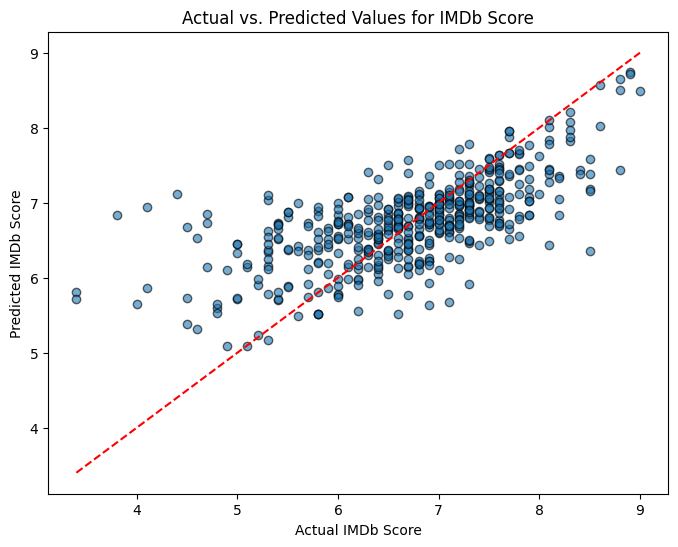

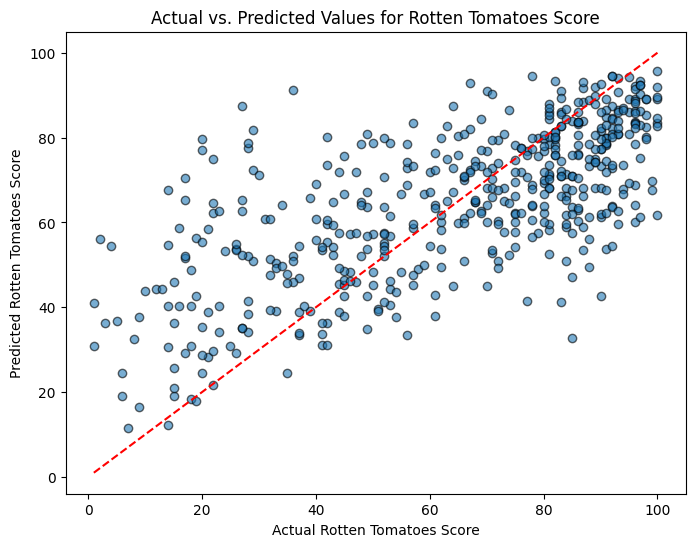

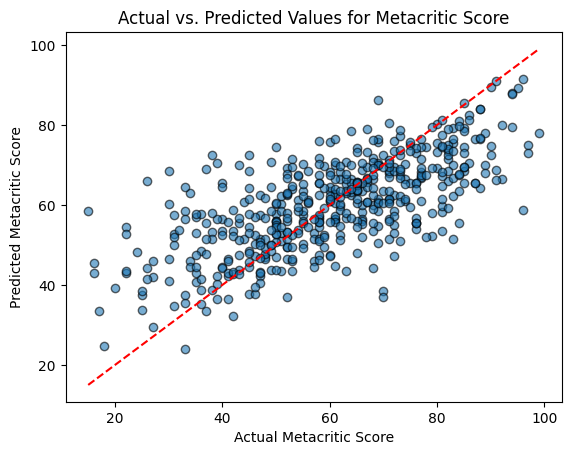

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')
plt.title('Actual vs. Predicted Values for IMDb Score')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_rt, y_pred_rt, alpha=0.6, edgecolor='k')
plt.plot([min(y_test_rt), max(y_test_rt)], [min(y_test_rt), max(y_test_rt)], color='red', linestyle='--')
plt.xlabel('Actual Rotten Tomatoes Score')
plt.ylabel('Predicted Rotten Tomatoes Score')
plt.title('Actual vs. Predicted Values for Rotten Tomatoes Score')
plt.show()

plt.scatter(y_test_mc, y_pred_mc, alpha=0.6, edgecolor='k')
plt.plot([min(y_test_mc), max(y_test_mc)], [min(y_test_mc), max(y_test_mc)], color='red', linestyle='--')
plt.xlabel('Actual Metacritic Score')
plt.ylabel('Predicted Metacritic Score')
plt.title('Actual vs. Predicted Values for Metacritic Score')
plt.show()